<a href="https://colab.research.google.com/github/ammarhusain/colab-sandbox/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.



In [0]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random
tf.enable_eager_execution()


In [0]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]
print(X.shape)

(17,)


In [5]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
print(W)
# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

# Stochastic Gradient Descent Optimizer.
#! optimizer = tf.optimizers.SGD(learning_rate)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

<tf.Variable 'weight:0' shape=() dtype=float32, numpy=-2.0247376>


In [0]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        # Compute gradients.
        gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

run_optimization()  

In [7]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.274320, W: 0.503521, b: -0.986955
step: 100, loss: 0.251744, W: 0.488679, b: -0.881736
step: 150, loss: 0.231750, W: 0.474712, b: -0.782717
step: 200, loss: 0.214043, W: 0.461568, b: -0.689532
step: 250, loss: 0.198362, W: 0.449199, b: -0.601838
step: 300, loss: 0.184473, W: 0.437558, b: -0.519311
step: 350, loss: 0.172173, W: 0.426603, b: -0.441646
step: 400, loss: 0.161280, W: 0.416294, b: -0.368558
step: 450, loss: 0.151633, W: 0.406592, b: -0.299776
step: 500, loss: 0.143089, W: 0.397462, b: -0.235046
step: 550, loss: 0.135522, W: 0.388870, b: -0.174131
step: 600, loss: 0.128821, W: 0.380784, b: -0.116805
step: 650, loss: 0.122886, W: 0.373174, b: -0.062856
step: 700, loss: 0.117630, W: 0.366013, b: -0.012086
step: 750, loss: 0.112975, W: 0.359274, b: 0.035692
step: 800, loss: 0.108852, W: 0.352931, b: 0.080655
step: 850, loss: 0.105201, W: 0.346963, b: 0.122969
step: 900, loss: 0.101968, W: 0.341346, b: 0.162790
step: 950, loss: 0.099104, W: 0.336060, b: 0.200265

In [0]:
import matplotlib.pyplot as plt

<tf.Variable 'bias:0' shape=() dtype=float32, numpy=0.235531>


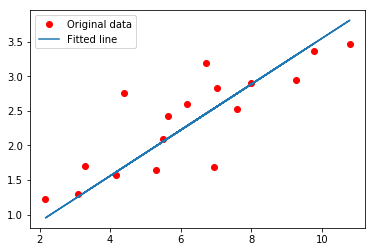

In [11]:
# Graphic display
print (b)
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()